## Sprawozdanie1

**Data:** 2024-05-19  
**Autor:** Piotr Szepietowski

## Zadania działu 1

## Zadanie 1
Utwórz macierze **A** i **B** oraz wektor **f** określone jako:
$$
A = \begin{bmatrix}
2 & -7 \\
5 & 4 \\
\end{bmatrix} 
B = \begin{bmatrix}
6 & 1 \\
4 & -3 \\
\end{bmatrix} 
f = \begin{bmatrix}
4 \\
1 \\
\end{bmatrix} 
$$

In [55]:
import numpy as np

A = np.array([[2, -7], [5, 4]])
B = np.array([[6, 1], [4, -3]])
f = np.array([[4, 1]])

print(f"A = {A}")
print(f"B = {B}")
print(f"f = {f}")

A = [[ 2 -7]
 [ 5  4]]
B = [[ 6  1]
 [ 4 -3]]
f = [[4 1]]


## Zadanie 2

**a.** Wyświetl rozmiar macierzy **A** oraz wektora **f**.  
**b.** Dokonaj transpozycji macierzy **B**.  
**c.** Oblicz wyrażenie: $(A + B)^2 + 2(A - B)$  
**d.** Utwórz macierz $C = [A, B]$ oraz wektor $h = [f, f]$  
**e.** Oblicz iloczyn $C \cdot h$

In [56]:
# a
print(f"Rozmiar macierzy A: {A.shape}")
print(f"Rozmiar wektora f: {f.shape}")

# b
print(f"Macierz B po transpozycji:\n{B.T}")

# c
print(f"Wynik operacji (A + B)^2 + 2(A - B):\n{np.linalg.matrix_power(A + B, 2) + 2 * (A - B)}")

# d
C = np.vstack((A, B))
print(f"Macierz C = np.vstack((A, B))\n{C}")
h = np.vstack((f.T, f.T))
print(f"Wektor h = np.vstack((f.T, f.T))\n{h}")

# e
print(f"Macierz C.T * h:\n{C.T @ h}\nNiemożliwe do obliczenia, ponieważ liczba kolumn macierzy C nie zgadza się z liczbą wierszy wektora h, więc mnożenie wykonano po transpozycji macierzy C.")

Rozmiar macierzy A: (2, 2)
Rozmiar wektora f: (1, 2)
Macierz B po transpozycji:
[[ 6  4]
 [ 1 -3]]
Wynik operacji (A + B)^2 + 2(A - B):
[[  2 -70]
 [ 83 -39]]
Macierz C = np.vstack((A, B))
[[ 2 -7]
 [ 5  4]
 [ 6  1]
 [ 4 -3]]
Wektor h = np.vstack((f.T, f.T))
[[4]
 [1]
 [4]
 [1]]
Macierz C.T * h:
[[ 41]
 [-23]]
Niemożliwe do obliczenia, ponieważ liczba kolumn macierzy C nie zgadza się z liczbą wierszy wektora h, więc mnożenie wykonano po transpozycji macierzy C.


## Zadanie 3

**a.** Wyświetl wszystkie zmienne lokalne.  
**b.** Zapisz zmienne w pliku `dane`.  
**c.** Usuń wszystkie zmienne.  
**d.** Wyświetl zawartość katalogu roboczego.

In [57]:
import os

# a. Wyświetl wszystkie zmienne lokalne
print("Zmienne lokalne:", list(locals().keys()))

# b. Zapisz zmienne w pliku 'dane' jako tekst
with open('dane', 'w') as f_out:
    f_out.write(f"Zmienne lokalne:\n")
    for x in list(locals().keys()):
        f_out.write(f"{x}\n")

# c. Usuń wszystkie zmienne
vars_to_delete = [var for var in globals().keys() if not var.startswith("_") and var not in ["pickle", "f_out", "os", "types"]]
for var in vars_to_delete:
    del globals()[var]

# d. Wyświetl zawartość katalogu roboczego
print(f"Zawartość katalogu domowego to: {os.listdir()}")

Zmienne lokalne: ['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', '_i2', '_i3', 'os', 'f_out', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i30', 'var', '_i31', 'np', 'x', 'Y', '_i32', 'math', 'e', '_i33', 'z', '_i34', 'ones', 'zeroes', 'random', '_i35', 'A', 'y', '_i36', 'i', 'j', '_i37', '_i38', 'display', 'n', '_i39', 'time', 'x_points', 'start_loop', 'y_loop', 'xi', 'end_loop', 'start_vec', 'y_vec', 'end_vec', '_i40', 'metrs', '_i41', 'random_vector', '_i42', 'data', 'matrix_4x5', '_i43', 'CtoF', 'CtoK', 'Tc', 'Tk', 'f', '_i44', 'lines', 'line', '_i45', 'plt', 'y_sin', 'y_cos', 'fig', 'axs', '_i46', 'y2', '_i47', 'x_stairs', '_i48', 'Axes3D', 'matrix', 'X', 'Y_grid', 'cp', 'ax3d', 'ax1', 'sur

## Zadanie 4

**a.** Utwórz 24-elementowy wektor $x = [1, 2, \ldots, 24]$.  
**b.** Z wektora $x$ utwórz macierz $Y$ o postaci $6 \times 4$.

In [58]:
import numpy as np
x = np.array([x for x in range(1, 25)])
print(f"x = {x}")

Y = x.reshape(4, 6)
print(f"Y = {Y}")


x = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Y = [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]


## Zadanie 5

Oblicz:  
**a.** $e^{2\sin(2\pi)}$  
**b.** $\cos\left(\frac{\pi}{3}\right)^4$  
**c.** $\ln(\sqrt{5})$

In [59]:
import math
e = math.e
print(f"a = {e ** (2 * math.sin(2 * math.pi))}")
print(f"b = {math.cos(math.pi / 3) ** 4}")
print(f"c = {math.log(math.sqrt(5))}")

a = 0.9999999999999996
b = 0.06250000000000006
c = 0.8047189562170503


## Zadanie 6
Oblicz:  
**a.** moduł liczby zespolonej $z = 3 - 2j$  
**b.** argument $z$  
**c.** liczba zespolona sprzężona do $z$

In [60]:
z = 3 - 2j
print(f"z = {z}")
print(f"Mod(z) = {abs(z)}")
print(f"Arg(z) = {math.atan2(z.imag, z.real)}")
print(f"Sprzężona z = {z.conjugate()}")

z = (3-2j)
Mod(z) = 3.605551275463989
Arg(z) = -0.5880026035475675
Sprzężona z = (3+2j)


## Zadanie 7
Utwórz macierze o rozmiarze 3x4: $$ $$
**a.**  
Macierz o elementach równych 1:  
$$
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
\end{bmatrix}
$$

**b.**  
Macierz o elementach równych 0:  
$$
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

**c.**  
Macierz o argumentach pseudolosowych:  
$$
\begin{bmatrix}
x_{11} & x_{12} & x_{13} & x_{14} \\
x_{21} & x_{22} & x_{23} & x_{24} \\
x_{31} & x_{32} & x_{33} & x_{34} \\
\end{bmatrix}
$$  
gdzie $x_{ij}$ to liczby pseudolosowe.

In [61]:
ones = np.ones((3, 4))
print(f"Macierz jedynek:\n{ones}")
zeroes = np.zeros((3, 4))
print(f"Macierz zer:\n{zeroes}")
random = np.random.rand(3, 4)
print(f"Macierz pseudolosowych liczb:\n{random}")

Macierz jedynek:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Macierz zer:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Macierz pseudolosowych liczb:
[[0.05679578 0.82138937 0.2007281  0.37843115]
 [0.92940438 0.39218665 0.49874015 0.42395222]
 [0.95727756 0.71015081 0.27885479 0.82521187]]



---
## Zadania działu 2
## Zadanie 1
Utwórz macierz **A** o rozmiarze 6x6, gdzie  
$$
x_{ij} = 
\begin{cases}
\frac{1}{i-j} & \text{dla } i \neq j \\
0 & \text{dla } i = j
\end{cases}
$$

In [62]:
A = np.zeros((6, 6))
for x in range(6):
    for y in range(6):
        if x != y:
            A[x, y] = 1 / ( x - y )
print(f"Macierz A:\n{A}")

Macierz A:
[[ 0.         -1.         -0.5        -0.33333333 -0.25       -0.2       ]
 [ 1.          0.         -1.         -0.5        -0.33333333 -0.25      ]
 [ 0.5         1.          0.         -1.         -0.5        -0.33333333]
 [ 0.33333333  0.5         1.          0.         -1.         -0.5       ]
 [ 0.25        0.33333333  0.5         1.          0.         -1.        ]
 [ 0.2         0.25        0.33333333  0.5         1.          0.        ]]


## Zadanie 2
Wygeneruj macierz o rozmiarze 10x10 wypełnioną liczbami pseudolosowymi, wyświetl elementy macierzy z przedziału (0.2-0.5).

In [63]:
A = np.random.rand(10, 10)
for i in range(10):
    for j in range(10):
        if A[i, j] < 0.5 and A[i, j] > 0.2:
            print(f"A[{i}, {j}] = {A[i, j]}")

A[0, 6] = 0.46114798648871835
A[0, 7] = 0.3453292630983056
A[0, 8] = 0.2155165069473206
A[0, 9] = 0.2598613690389028
A[1, 4] = 0.3815153176144086
A[1, 6] = 0.27692093724549727
A[1, 7] = 0.3535873105623685
A[2, 1] = 0.4969434005937591
A[2, 2] = 0.25817287909176523
A[2, 3] = 0.4220151423725018
A[2, 5] = 0.4135756408628004
A[2, 8] = 0.4155746311066153
A[2, 9] = 0.43044411223663726
A[3, 1] = 0.2594308552074903
A[3, 7] = 0.2692759175289873
A[3, 9] = 0.42731866462053303
A[4, 1] = 0.3269298805172667
A[4, 3] = 0.3781280256079582
A[4, 8] = 0.34968871937709134
A[5, 6] = 0.2262995390136836
A[5, 8] = 0.2077672279911572
A[6, 1] = 0.276469230057802
A[6, 2] = 0.31590043947445834
A[6, 6] = 0.20688253994668104
A[7, 0] = 0.4455784174114851
A[7, 5] = 0.36477231956193745
A[8, 3] = 0.22762541351499233
A[8, 9] = 0.3247715439172295
A[9, 1] = 0.4181822480526991
A[9, 5] = 0.36556444122367915
A[9, 7] = 0.30748250058406634


## Zadanie 3
Napisz skrypt w języku Python, który:

1. W pierwszych wierszach zawiera komentarz:
   
   ```
   # Skrypt ten jest skryptem testowym
   # Obliczane jest wyrazenie sin(a)*cos(b)
   # gdzie a, b - dwie wczytane liczby
   ```

2. Wczytuje dwie liczby `a` i `b` od użytkownika za pomocą funkcji `input()`.

3. Oblicza wartość wyrażenia `sin(a)*cos(b)` i wyświetla wynik.

In [64]:
# Skrypt ten jest skryptem testowym
# Obliczane jest wyrazenie sin(a)*cos(b)
# gdzie a, b - dwie wczytane liczby

# Zostaje zakomentowane ponieważ w jupyterze nie można używać input

#a = float(input("Podaj liczbę a: "))
#b = float(input("Podaj liczbę b: "))

#wynik = math.sin(a) * math.cos(b)
#print(f"Wynik: {wynik}")

## Zadanie 4

Napisz skrypt, którego zadaniem będzie prezentacja operacji na macierzach. W skrypcie wykonaj następujące polecenia:

**a.** wczytaj:
   - rozmiar macierzy (n),
   - dwie macierze o rozmiarze n×n: A i B,

**b.** oblicz:
   - macierz odwrotną do A,
   - transpozycję macierzy B,
   - sumę macierzy – A+B,
   - różnicę macierzy – A-B,
   - iloczyn macierzowy – A·B,
   - iloczyn macierzy A przez dowolną liczbę.

In [65]:
def display(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    print(f"Macierz A:\n{A}\nMacierz B:\n{B}")
    print(f"A odwrócona:\n{np.linalg.inv(A)}")
    print(f"B po transpozycji:\n{B.T}")
    print(f"Suma A + B:\n{A + B}")
    print(f"Różnica A - B:\n{A - B}")
    print(f"Iloczyn A * B:\n{A @ B}")
    print(f"Iloczyn macierzy A przez skalara 5:\n{A * 5}")    

n = 3
display(n)

Macierz A:
[[0.77766601 0.28407677 0.73928928]
 [0.74062267 0.19292047 0.52328057]
 [0.77537948 0.54763529 0.47831396]]
Macierz B:
[[0.26016854 0.21329688 0.81550532]
 [0.88704202 0.84096929 0.31990345]
 [0.84328273 0.42515535 0.47938414]]
A odwrócona:
[[-3.68003689  5.09478428  0.11417233]
 [ 0.97528386 -3.81207174  2.66303364]
 [ 4.84895995 -3.89444243 -1.14338724]]
B po transpozycji:
[[0.26016854 0.88704202 0.84328273]
 [0.21329688 0.84096929 0.42515535]
 [0.81550532 0.31990345 0.47938414]]
Suma A + B:
[[1.03783456 0.49737365 1.5547946 ]
 [1.62766469 1.03388977 0.84318401]
 [1.61866221 0.97279064 0.9576981 ]]
Różnica A - B:
[[ 0.51749747  0.07077989 -0.07621603]
 [-0.14641935 -0.64804882  0.20337712]
 [-0.06790325  0.12247994 -0.00107018]]
Iloczyn A * B:
[[1.07774215 0.71908636 1.07947146]
 [0.80508875 0.54268823 0.91655005]
 [1.09085876 0.82928822 1.03681263]]
Iloczyn macierzy A przez skalara 5:
[[3.88833006 1.42038384 3.69644642]
 [3.70311334 0.96460236 2.61640284]
 [3.87689739 2.

## Zadanie 5
Oblicz i porównaj czas wykonania dla dwóch metod:

**a. Obliczenia w pętli (element po elemencie):**  
Dla każdego punktu z przedziału od -10 do 10 z krokiem 0,001 oblicz wartość funkcji cosinus, zapisując wyniki do listy. Zmierz czas wykonania tej operacji.

**b. Obliczenia tablicowe (jednorazowo):**  
Oblicz wartości funkcji cosinus dla wszystkich punktów z przedziału od -10 do 10 z krokiem 0,001 jednocześnie, wykorzystując operacje na tablicach. Zmierz czas wykonania tej operacji.

In [66]:
import time

x_points = np.arange(-10, 10.001, 0.001)

start_loop = time.time()
y_loop = []
for xi in x_points:
    y_loop.append(np.cos(xi))
end_loop = time.time()
print(f"Czas obliczeń w pętli: {end_loop - start_loop:.4f} s")

start_vec = time.time()
y_vec = np.cos(x_points)
end_vec = time.time()
print(f"Czas obliczeń tablicowych: {end_vec - start_vec:.4f} s")

Czas obliczeń w pętli: 0.0510 s
Czas obliczeń tablicowych: 0.0005 s


## Zadanie 2.6

Napisz funkcję **metrs**, dokonującą przeliczenia prędkości wyrażonej w [km/h] na prędkość w [m/s].

In [67]:
def metrs(velocity):
    return velocity / 3.6

print(f"Prędkość 90 km/h w m/s: {metrs(90)}")

Prędkość 90 km/h w m/s: 25.0



---
## Zadania działu 3
## Zadanie 1
Zapisz w pliku dane.bin 50-elementowy wektor liczb pseudolosowych.

In [68]:
random_vector = np.random.rand(50)
print(f"Losowy wektor: {random_vector}")
random_vector.tofile('dane.bin')
print("Wygenerowano plik dane.bin z losowymi danymi.")

Losowy wektor: [0.66713382 0.19539748 0.89241906 0.76856107 0.1648342  0.50125861
 0.54988745 0.26313593 0.10518028 0.1856933  0.52244674 0.13887973
 0.45198391 0.83515655 0.21777776 0.58397978 0.66617588 0.11021176
 0.85732877 0.42162476 0.16021277 0.87747849 0.63430544 0.96310056
 0.64641784 0.85417814 0.84739183 0.89679096 0.01664662 0.6779684
 0.78531776 0.55708059 0.07490491 0.31505971 0.36616312 0.78372146
 0.23168625 0.61867966 0.10482118 0.85943073 0.03136739 0.17713739
 0.89081524 0.93565616 0.74658637 0.88448016 0.06611298 0.81174281
 0.97982422 0.65154237]
Wygenerowano plik dane.bin z losowymi danymi.


## Zadanie 2
Wczytaj pierwsze 20 wartości z pliku dane.bin do macierzy o rozmiarze 4x5.

In [69]:
data = np.fromfile('dane.bin', dtype=np.float64, count=20)
matrix_4x5 = data.reshape(4, 5)
print(matrix_4x5)

[[0.66713382 0.19539748 0.89241906 0.76856107 0.1648342 ]
 [0.50125861 0.54988745 0.26313593 0.10518028 0.1856933 ]
 [0.52244674 0.13887973 0.45198391 0.83515655 0.21777776]
 [0.58397978 0.66617588 0.11021176 0.85732877 0.42162476]]


## Zadanie 3  
**Napisz skrypt przeliczający temperaturę w stopniach Celsjusza na Fahrenheity.**

**a.** Wygeneruj wektor $T_c$ z wartościami temperatury w Celsjuszach od 0 do 300 z krokiem 20.  
**b.** Przelicz ją na stopnie Kelwina i zapisz w wektorze $T_k$.  
**c.** Wektory $T_c$ i $T_k$ zapisz w pliku `temperatura.txt`.

In [70]:
# a
def CtoF(c):
    return c * 9 / 5 + 32

def CtoK(c):
    return c + 273.15

# b
Tc = np.array([x for x in range(0, 301, 20)])
Tk = CtoK(Tc)

# c 
with open('temperatura.txt', 'w') as f:
    f.write("Celsius\tFahrenheit\tKelvin\n")
    for i in range(len(Tc)):
        f.write(f"{Tc[i]}\t{CtoF(Tc[i])}\t{Tk[i]}\n")

## Zadanie 4
Napisz skrypt wczytujący dane z pliku `temperatura.txt`.

In [71]:
with open('temperatura.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        print(line.strip())

Celsius	Fahrenheit	Kelvin
0	32.0	273.15
20	68.0	293.15
40	104.0	313.15
60	140.0	333.15
80	176.0	353.15
100	212.0	373.15
120	248.0	393.15
140	284.0	413.15
160	320.0	433.15
180	356.0	453.15
200	392.0	473.15
220	428.0	493.15
240	464.0	513.15
260	500.0	533.15
280	536.0	553.15
300	572.0	573.15



---
## Zadania z działu 4

### Zadanie 1

Stwórz dwa wykresy funkcji:

- **a.** Horyzontalnie obok siebie  
- **b.** Wertykalnie jeden pod drugim  

Na jednym z nich umieść wykres funkcji $\sin(x)$, a na drugim $\cos(x)$ w przedziale $x \in [-2\pi, 2\pi]$.

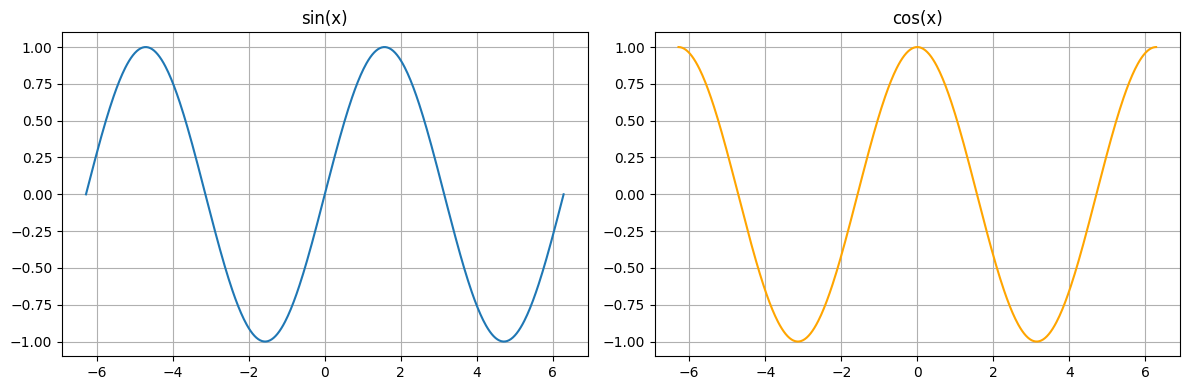

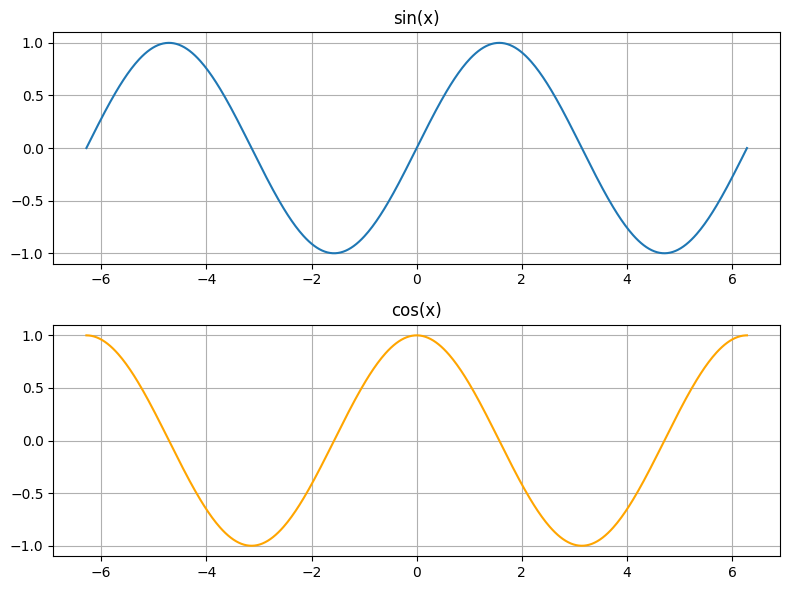

In [72]:
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y_sin = np.sin(x)
y_cos = np.cos(x)

# a. Horyzontalnie obok siebie
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(x, y_sin, label='sin(x)')
axs[0].set_title('sin(x)')
axs[0].grid(True)
axs[1].plot(x, y_cos, label='cos(x)', color='orange')
axs[1].set_title('cos(x)')
axs[1].grid(True)
plt.tight_layout()
plt.show()

# b. Wertykalnie jeden pod drugim
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].plot(x, y_sin, label='sin(x)')
axs[0].set_title('sin(x)')
axs[0].grid(True)
axs[1].plot(x, y_cos, label='cos(x)', color='orange')
axs[1].set_title('cos(x)')
axs[1].grid(True)
plt.tight_layout()
plt.show()

## Zadanie 2
Przyjmując dane:  
$x = [0,\ 1,\ 2,\ 3,\ 4,\ 5,\ 6]$  
$y = [0,\ 0{,}95,\ 3{,}9,\ 9{,}4,\ 15{,}2,\ 22{,}3,\ 37{,}1]$

**a)** Narysuj wykres wartości $y(x)$, oznaczając je kółkami.  
**b)** Oblicz wartości $y_2(x) = x^2$ i oznacz je na wykresie kwadracikami, łącząc jednocześnie linią ciągłą.  
**c)** Zakres skali na osi $x$ ustaw od 0 do 6, a na osi $y$ od 0 do 40.  
**d)** Dodaj opisy osi (`oś x`, `oś y`), tytuł (`Porównanie`) oraz legendę, określając pierwszy wykres jako *pomiary*, a drugi – *obliczenia*.  
**e)** Narysuj siatkę.

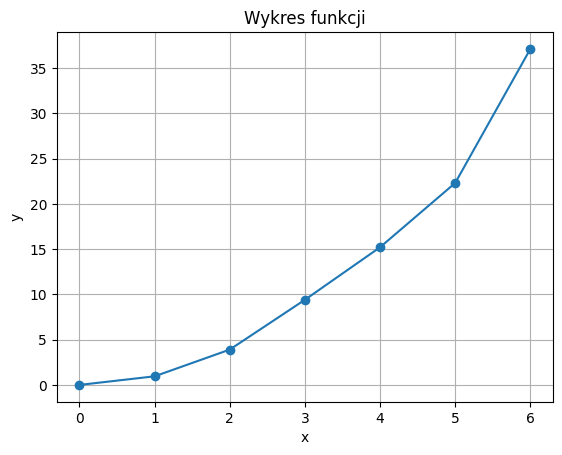

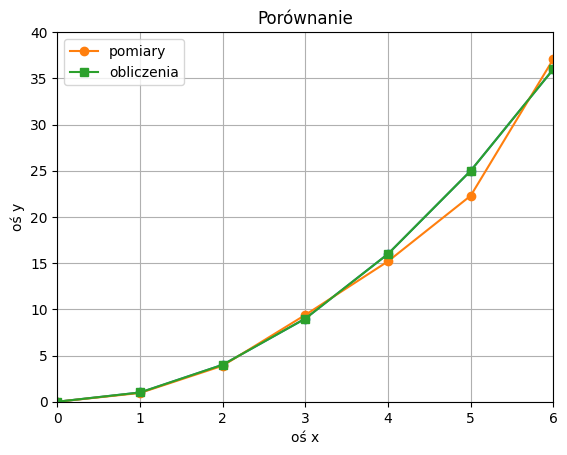

In [73]:
# a. Wykres funkcji
x = np.array([0,1,2,3,4,5,6])
y = np.array([0,0.95,3.9,9.4,15.2,22.3,37.1])

plt.plot(x, y, 'o-')
plt.title('Wykres funkcji')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# b. 
y2 = np.array([xi**2 for xi in x])
plt.plot(x, y2, 'o-')
plt.plot(x, y, 'o-', label='pomiary')
plt.plot(x, y2, 's-', label='obliczenia')
plt.xlim(0, 6)
plt.ylim(0, 40)
plt.xlabel('oś x')
plt.ylabel('oś y')
plt.title('Porównanie')
plt.legend()
plt.grid()
plt.show()

# c. Wykres został już wyskalowany w poprzednim kroku

# d. Opis dodałem w kroku b

# e. Siatkę dodałem w kroku b



## Zadanie 3
Przyjmując dane:  
$x = [1,\ 2,\ 3,\ 4]$  
$y = [2.2,\ 6.5,\ 0,\ 4.1]$  

Narysuj kolejno w różnych oknach trzy rodzaje wykresów dyskretnych: **bar**, **stem** i **stairs**.

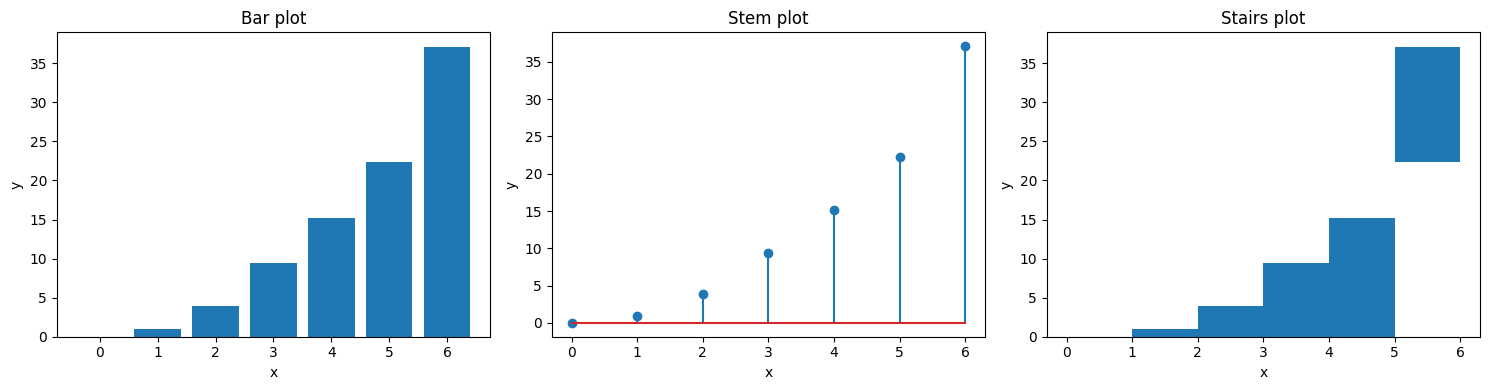

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Bar plot
axs[0].bar(x, y)
axs[0].set_title('Bar plot')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Stem plot
axs[1].stem(x, y)
axs[1].set_title('Stem plot')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Stairs plot
x_stairs = np.append(x, 5)
axs[2].stairs(y, x_stairs, fill=True)
axs[2].set_title('Stairs plot')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

plt.tight_layout()
plt.show()


### Zadanie 4

Oblicz wartości macierzy  
$$
z(x, y) = (x - 5)^2 - (y - 5)^2 \quad \text{dla} \quad x, y = 1, 2, \ldots, 10
$$

Narysuj i porównaj wykresy wartości z:

a) **poziomicowe** – `contour`, `contour3`  
b) **powierzchniowe** – `surf` (`surfc`, `surfl`), `mesh` (`meshc`, `meshz`), **waterfall**

Macierz:
[[  0.   7.  12.  15.  16.  15.  12.   7.   0.  -9.]
 [ -7.   0.   5.   8.   9.   8.   5.   0.  -7. -16.]
 [-12.  -5.   0.   3.   4.   3.   0.  -5. -12. -21.]
 [-15.  -8.  -3.   0.   1.   0.  -3.  -8. -15. -24.]
 [-16.  -9.  -4.  -1.   0.  -1.  -4.  -9. -16. -25.]
 [-15.  -8.  -3.   0.   1.   0.  -3.  -8. -15. -24.]
 [-12.  -5.   0.   3.   4.   3.   0.  -5. -12. -21.]
 [ -7.   0.   5.   8.   9.   8.   5.   0.  -7. -16.]
 [  0.   7.  12.  15.  16.  15.  12.   7.   0.  -9.]
 [  9.  16.  21.  24.  25.  24.  21.  16.   9.   0.]]


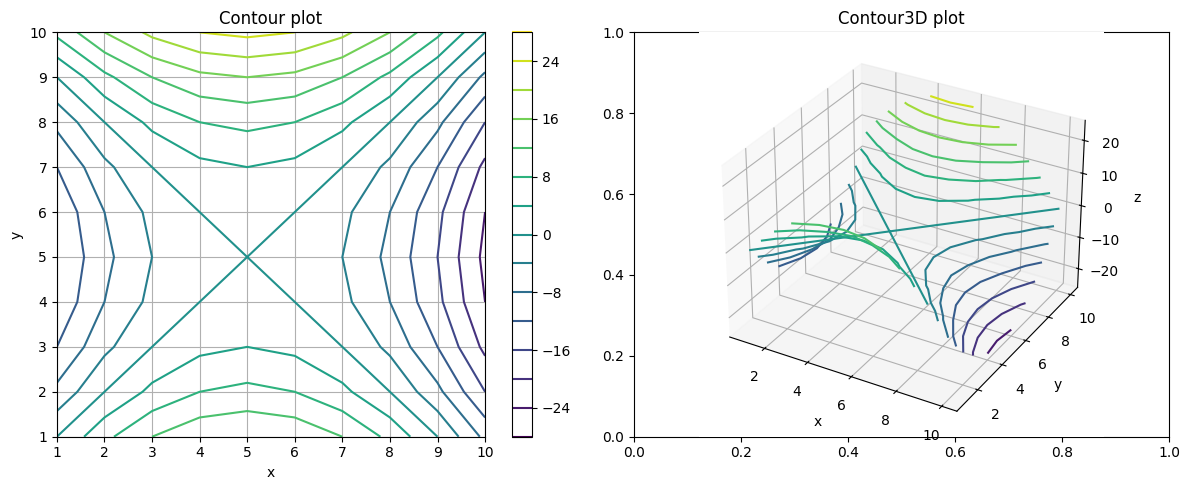

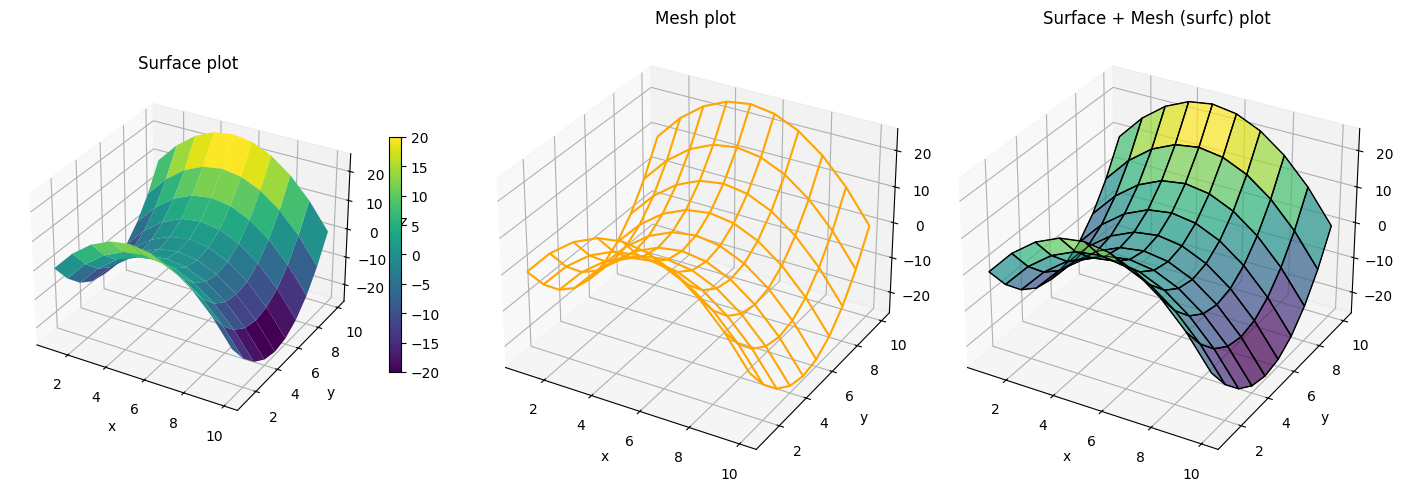

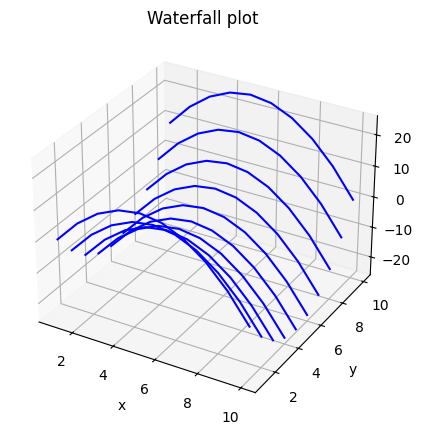

In [75]:
from mpl_toolkits.mplot3d import Axes3D

x = np.array([x for x in range(1, 11)])
y = np.array([x for x in range(1, 11)])
matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        matrix[i, j] = (x[i] - 5) ** 2 - (y[j] - 5) ** 2
print(f"Macierz:\n{matrix}")

# a) Wykresy poziomicowe
X, Y_grid = np.meshgrid(x, y)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cp = axs[0].contour(X, Y_grid, matrix, levels=15)
axs[0].set_title('Contour plot')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(cp, ax=axs[0])
axs[0].grid(True)

ax3d = fig.add_subplot(1, 2, 2, projection='3d')
ax3d.contour3D(X, Y_grid, matrix, levels=15, cmap='viridis')
ax3d.set_title('Contour3D plot')
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')

plt.tight_layout()
plt.show()

# b) Wykresy powierzchniowe
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax1.plot_surface(X, Y_grid, matrix, cmap='viridis')
ax1.set_title('Surface plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
fig.colorbar(surf, ax=ax1, shrink=0.5)

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
mesh = ax2.plot_wireframe(X, Y_grid, matrix, color='orange')
ax2.set_title('Mesh plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y_grid, matrix, cmap='viridis', edgecolor='k', alpha=0.7)
ax3.plot_wireframe(X, Y_grid, matrix, color='black', linewidth=0.5)
ax3.set_title('Surface + Mesh (surfc) plot')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(matrix.shape[0]):
    ax.plot(x, [y[i]]*len(x), matrix[i, :], color='b')
ax.set_title('Waterfall plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


## Zadanie 5

Za pomocą polecenia **surf** narysuj wykres funkcji:

$$
z(x, y) = (x - y)(x + y) + e^{\sqrt{x^2 + y^2}}
$$

w przedziale $x, y \in \langle -5, 5 \rangle$.  
Dodaj siatkę. Zakres skali na obu osiach ustaw od $-5$ do $5$.

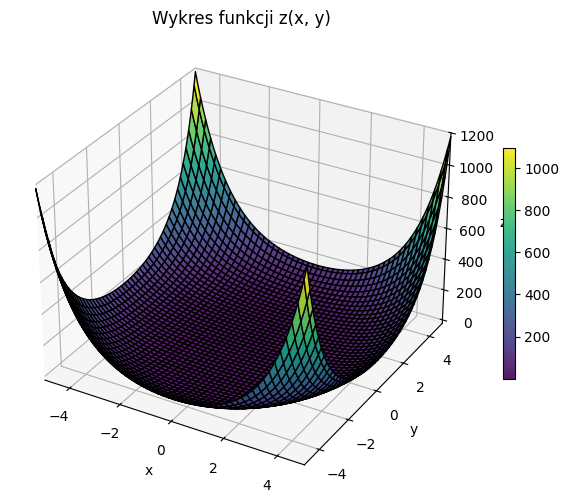

In [76]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X_grid, Y_grid = np.meshgrid(x, y)
Z = (X_grid - Y_grid) * (X_grid + Y_grid) + np.exp(np.sqrt(X_grid**2 + Y_grid**2))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis', edgecolor='k', alpha=0.9)
ax.set_title('Wykres funkcji z(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid(True)
fig.colorbar(surf, ax=ax, shrink=0.5)
plt.show()

## Zadanie 6
Zmień własności aktywnych obiektów z zadania 4.5, ustawiając wartości:

a) `GridLineStyle` – na linię kropkowaną,  
b) `XTick` i `YTick` – na `[-4, -2, 0, 2, 4]`.

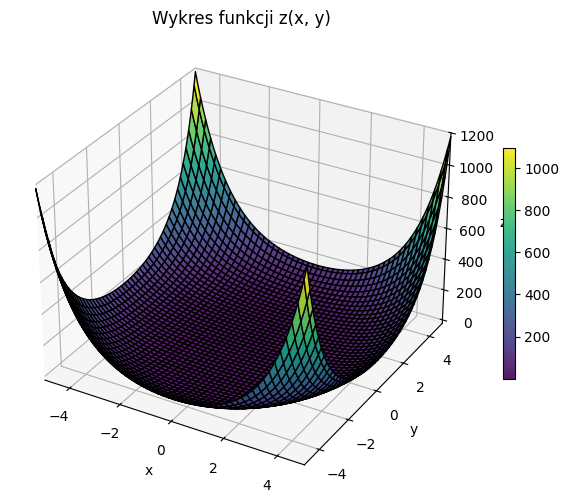

In [77]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis', edgecolor='k', alpha=0.9)
ax.set_title('Wykres funkcji z(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid(True, linestyle=':')
ax.set_xticks([-4, -2, 0, 2, 4])
ax.set_yticks([-4, -2, 0, 2, 4])
fig.colorbar(surf, ax=ax, shrink=0.5)
plt.show()

## Zadanie 7 
W lewym dolnym rogu okna z wykresem z zadania 4.6 utwórz przycisk o nazwie **"Czyść"**, którego naciśnięcie spowoduje wyczyszczenie aktywnego układu współrzędnych.

In [78]:
# nie mam pojęcia jak to zrobić
# i will be back

## Zadanie 8

Odczytaj dane zapisane w pliku tekstowym **temperatura.txt** (zadanie 3.3) i sporządź wykresy $T_c(t)$ i $T_k(t)$, gdzie $t = 1:\text{length}(T_c)$, każdy innym kolorem linii. Zmodyfikuj wykres, zmieniając właściwości obiektów graficznych:

a) Zmień nazwę rysunku w pasku tytułowym okna na: *Wykresy temperatury*  
b) Dodaj element menu głównego o nazwie *Przebiegi* (wyróżniona ma być litera **P**)  
c) Dodaj rozwijane podmenu, składające się z dwóch elementów – $T_c(t)$ i $T_k(t)$; uaktywnienie jednego z elementów podmenu będzie powodowało rysowanie właściwego wykresu.

Temperatura w Celsjuszach: [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0, 260.0, 280.0, 300.0]
Temperatura w Farenheitach: [32.0, 68.0, 104.0, 140.0, 176.0, 212.0, 248.0, 284.0, 320.0, 356.0, 392.0, 428.0, 464.0, 500.0, 536.0, 572.0]
Temperatura w Kelvinach: [273.15, 293.15, 313.15, 333.15, 353.15, 373.15, 393.15, 413.15, 433.15, 453.15, 473.15, 493.15, 513.15, 533.15, 553.15, 573.15]


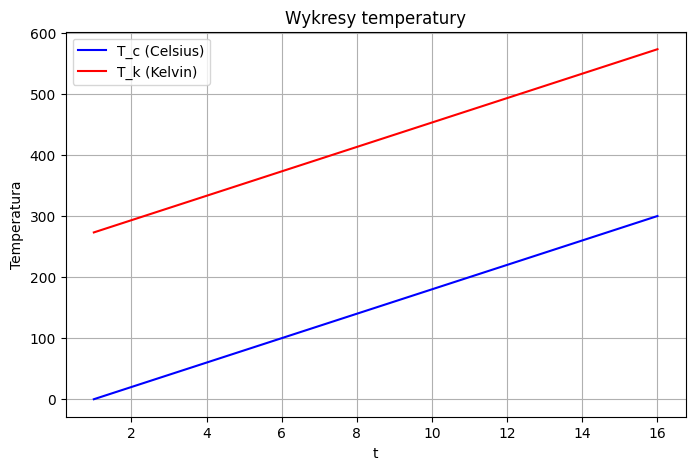

In [79]:
Tk, Tc, Tf = [], [], []
with open('temperatura.txt', 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        c, f, k = map(float, line.split())
        Tc.append(c)
        Tf.append(f)
        Tk.append(k)

print(f"Temperatura w Celsjuszach: {Tc}")
print(f"Temperatura w Farenheitach: {Tf}")
print(f"Temperatura w Kelvinach: {Tk}")

t = range(1, len(Tc) + 1)
plt.figure(figsize=(8, 5))
plt.plot(t, Tc, label='T_c (Celsius)', color='blue')
plt.plot(t, Tk, label='T_k (Kelvin)', color='red')
plt.xlabel('t')
plt.ylabel('Temperatura')
plt.title('Wykresy temperatury')
plt.legend()
plt.grid(True)
plt.show()
# Dorobienie rozwijanego menu jest trudne przez charakter jupyter notebooka, na razie to zostawiam
# i will be back


---
### Zadania z działu 5
## Zadanie 1
Wyznacz miejsce zerowe funkcji $\sin(x)$, startując z punktu $x = 3$.

In [80]:
from scipy.optimize import fsolve
root = fsolve(np.sin, 3)
print(f"Miejsce zerowe funkcji sin(x) startując z x=3: x = {root[0]}")

Miejsce zerowe funkcji sin(x) startując z x=3: x = 3.141592653589793


## Zadanie 2
Wyznacz pierwiastki wielomianów:

a)  W(x) = x^2 + 3x - 4 

b)  W(x) = -2x^4 + 3x^2 + x - 6 

In [81]:
print(f"Miejsca zerowe wielomianu x^2 + 3x - 4 to: {np.roots([1, 3, -4])}")
print(f"Miejsca zerowe wielomianu -2x^4 + 3x^2 + x - 6 to: {np.roots([-2, 0, 3, 1, -6])}")

Miejsca zerowe wielomianu x^2 + 3x - 4 to: [-4.  1.]
Miejsca zerowe wielomianu -2x^4 + 3x^2 + x - 6 to: [-1.1148265+0.7777938j  -1.1148265-0.7777938j   1.1148265+0.61701949j
  1.1148265-0.61701949j]


## Zadanie 3
Rozwiąż układ równań:

$$
\begin{cases}
a + 2b + 3c + 4d = 1 \\
3a + 4b + 5c + 6d = 2 \\
2a + 3b + 5c = 4 \\
3a + 5b + 2c + d = 6 \\
\end{cases}
$$

In [82]:
A = np.array([
    [1, 2, 3, 4],
    [3, 4, 5, 6],
    [2, 3, 5, 0],
    [3, 5, 2, 1]
])
b = np.array([1, 2, 4, 6])

solution = np.linalg.solve(A, b)
print(f"Rozwiązanie układu równań: a = {solution[0]}, b = {solution[1]}, c = {solution[2]}, d = {solution[3]}")

Rozwiązanie układu równań: a = -0.8939393939393941, b = 1.8030303030303032, c = 0.07575757575757565, d = -0.48484848484848475


## Zadanie 4 
Oblicz rząd i wyznacznik macierzy z zadania 1.

In [83]:
#chyba specyfika matlaba, w pythonie nie używałem macierzy, ale zrobię to dla A z poprzedniego zadania
print(f"Wyznacznik macierzy A: {np.linalg.det(A)}")
print(f"Rząd macierzy A: {np.linalg.matrix_rank(A)}")

Wyznacznik macierzy A: 66.00000000000003
Rząd macierzy A: 4


## Zadanie 5
Utwórz wektor wartości funkcji  y(x) = \cos(3x) + \cos(x)  w punktach x = -10:0.5:10. Przeprowadź interpolację za pomocą trzech dostępnych metod. Na jednym wykresie przedstaw węzły interpolacji i trzy uzyskane przebiegi funkcji. Dla danych x, y sprawdź działanie funkcji **polyfit**, wykorzystując różne stopnie wielomianu aproksymującego.

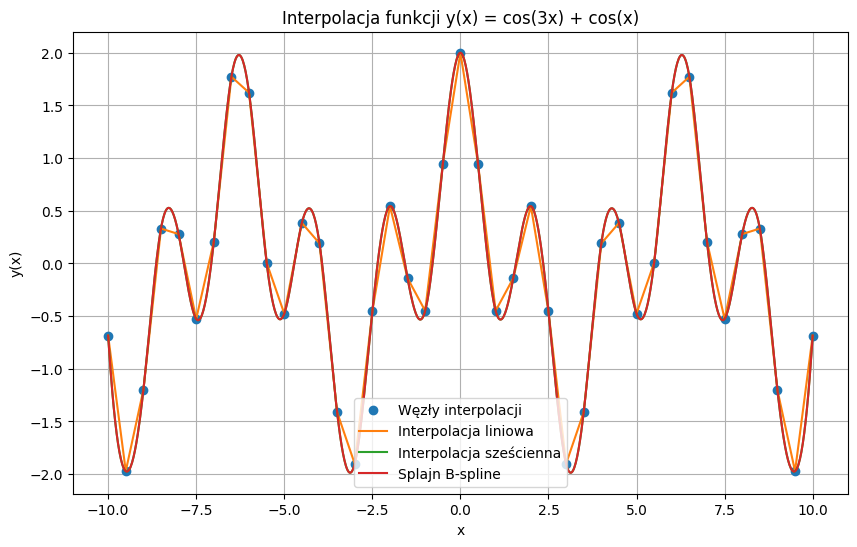

In [84]:
from scipy import interpolate

x_nodes = np.arange(-10, 10.5, 0.5)
y_nodes = np.cos(3 * x_nodes) + np.cos(x_nodes)

x_dense = np.linspace(-10, 10, 1000)

# Interpolacja: liniowa
interp_linear = interpolate.interp1d(x_nodes, y_nodes, kind='linear')
y_linear = interp_linear(x_dense)

# Interpolacja: sześcienna
interp_cubic = interpolate.interp1d(x_nodes, y_nodes, kind='cubic')
y_cubic = interp_cubic(x_dense)

# Interpolacja: splajnowa (B-spline)
spl = interpolate.make_interp_spline(x_nodes, y_nodes)
y_spline = spl(x_dense)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x_nodes, y_nodes, 'o', label='Węzły interpolacji')
plt.plot(x_dense, y_linear, label='Interpolacja liniowa')
plt.plot(x_dense, y_cubic, label='Interpolacja sześcienna')
plt.plot(x_dense, y_spline, label='Splajn B-spline')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Interpolacja funkcji y(x) = cos(3x) + cos(x)')
plt.legend()
plt.grid(True)
plt.show()

## Zadanie 6 
Oblicz całki:

a)  
$$
\int\limits_{-2}^{2} (x-1)^2 \, dx
$$

b)  
$$
\int\limits_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \left[ x + 2\sin(x) \right] dx
$$

In [85]:
# obliczanie całki na przedziale -2 do 2 z funckji f(x) = (x -1)^2
from scipy.integrate import quad
def f(x):
    return (x - 1) ** 2
result, error = quad(f, -2, 2)
print(f"Wynik całkowania f(x) = (x - 1)^2 w przedziale [-2, 2]: {result:.4f}")

#obliczanie całki na przedziale -pi/2 do pi/2 z funkcji f(x) = [x + 2sin(x)]
def f(x):
    return x + 2 * np.sin(x)
result, error = quad(f, -np.pi/2, np.pi/2)
print(f"Wynik całkowania f(x) = x + 2sin(x) w przedziale [-pi/2, pi/2]: {result:.4f}")

Wynik całkowania f(x) = (x - 1)^2 w przedziale [-2, 2]: 9.3333
Wynik całkowania f(x) = x + 2sin(x) w przedziale [-pi/2, pi/2]: 0.0000


## Zadanie 7
Rozwiąż równanie różniczkowe:

$$
\frac{dy}{dt} = -\left(1 + \sin^2(y)\right) y
$$

przyjmując różne wartości warunku początkowego $y(0) \neq 0$.  
Całkowanie przeprowadź w czasie $t = 3\,\text{s}$.

Ponieważ równanie jest pierwszego rzędu, zarówno wektor zmiennych stanu, jak i wektor warunków początkowych będą jednoelementowe (innymi słowy – będą liczbami).

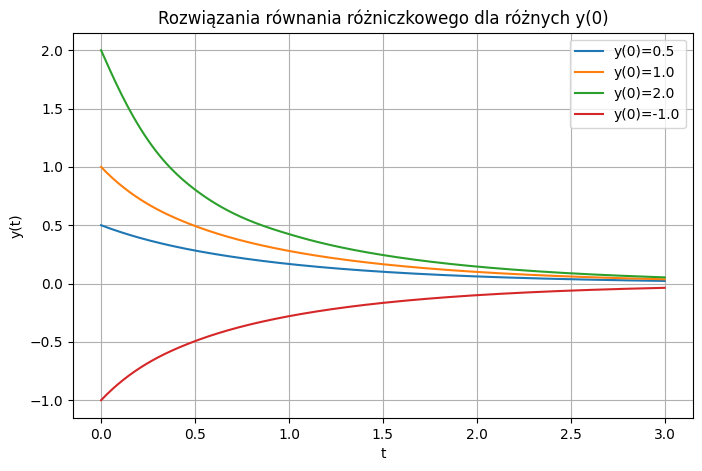

In [86]:
from scipy.integrate import solve_ivp

def dydt(t, y):
    return - (1 + np.sin(y)**2) * y

t_span = (0, 3)
t_eval = np.linspace(0, 3, 300)

initial_conditions = [0.5, 1.0, 2.0, -1.0]
plt.figure(figsize=(8, 5))
for y0 in initial_conditions:
    sol = solve_ivp(dydt, t_span, [y0], t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'y(0)={y0}')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Rozwiązania równania różniczkowego dla różnych y(0)')
plt.legend()
plt.grid(True)
plt.show()